# Assignment 9: GBDT

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#### Response Coding: Example

<img src='http://i.imgur.com/TufZptV.jpg' width=700px>

> The response tabel is built only on train dataset.
> For a category which is not there in train data and present in test data, we will encode them with default values
Ex: in our test data if have State: D then we encode it as [0.5, 0.05]

<ol>
    <li><strong>Apply GBDT on these feature sets</strong>
        <ul>
            <li><font color='red'>Set 1</font>: categorical(instead of one hot encoding, try <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/'>response coding</a>: use probability values), numerical features + project_title(TFIDF)+  preprocessed_eassay (TFIDF)+sentiment Score of eassay(check the bellow example, include all 4 values as 4 features)</li>
            <li><font color='red'>Set 2</font>: categorical(instead of one hot encoding, try <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/'>response coding</a>: use probability values), numerical features + project_title(TFIDF W2V)+  preprocessed_eassay (TFIDF W2V)</li>        </ul>
    </li>
    <li><strong>The hyper paramter tuning (Consider any two hyper parameters)</strong>
        <ul>
    <li>Find the best hyper parameter which will give the maximum <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/receiver-operating-characteristic-curve-roc-curve-and-auc-1/'>AUC</a> value</li>
    <li>find the best hyper paramter using k-fold cross validation/simple cross validation data</li>
    <li>use gridsearch cv or randomsearch cv or you can write your own for loops to do this task</li>
        </ul>
    </li>
    <li>
    <strong>Representation of results</strong>
        <ul>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure
    <img src='https://i.imgur.com/Gp2DQmh.jpg' width=500px> with X-axis as <strong>n_estimators</strong>, Y-axis as <strong>max_depth</strong>, and Z-axis as <strong>AUC Score</strong> , we have given the notebook which explains how to plot this 3d plot, you can find it in the same drive <i>3d_scatter_plot.ipynb</i></li>
            <p style="text-align:center;font-size:30px;color:red;"><strong>or</strong></p> <br>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure
    <img src='https://i.imgur.com/fgN9aUP.jpg' width=300px> <a href='https://seaborn.pydata.org/generated/seaborn.heatmap.html'>seaborn heat maps</a> with rows as <strong>n_estimators</strong>, columns as <strong>max_depth</strong>, and values inside the cell representing <strong>AUC Score</strong> </li>
    <li>You choose either of the plotting techniques out of 3d plot or heat map</li>
    <li>Once after you found the best hyper parameter, you need to train your model with it, and find the AUC on test data and plot the ROC curve on both train and test.
    <img src='https://i.imgur.com/wMQDTFe.jpg' width=300px></li>
    <li>Along with plotting ROC curve, you need to print the <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/confusion-matrix-tpr-fpr-fnr-tnr-1/'>confusion matrix</a> with predicted and original labels of test data points
    <img src='https://i.imgur.com/IdN5Ctv.png' width=300px></li>
            </ul>
    <br>
    <li>You need to summarize the results at the end of the notebook, summarize it in the table format
        <img src='http://i.imgur.com/YVpIGGE.jpg' width=400px>
    </li>
</ol>

In [2]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [3]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# import nltk
# nltk.download('vader_lexicon')

sid = SentimentIntensityAnalyzer()

for_sentiment = 'a person is a person no matter how small dr seuss i teach the smallest students with the biggest enthusiasm \
for learning my students learn in many different ways using all of our senses and multiple intelligences i use a wide range\
of techniques to help all my students succeed students in my class come from a variety of different backgrounds which makes\
for wonderful sharing of experiences and cultures including native americans our school is a caring community of successful \
learners which can be seen through collaborative student project based learning in and out of the classroom kindergarteners \
in my class love to work with hands on materials and have many different opportunities to practice a skill before it is\
mastered having the social skills to work cooperatively with friends is a crucial aspect of the kindergarten curriculum\
montana is the perfect place to learn about agriculture and nutrition my students love to role play in our pretend kitchen\
in the early childhood classroom i have had several kids ask me can we try cooking with real food i will take their idea \
and create common core cooking lessons where we learn important math and writing concepts while cooking delicious healthy \
food for snack time my students will have a grounded appreciation for the work that went into making the food and knowledge \
of where the ingredients came from as well as how it is healthy for their bodies this project would expand our learning of \
nutrition and agricultural cooking recipes by having us peel our own apples to make homemade applesauce make our own bread \
and mix up healthy plants from our classroom garden in the spring we will also create our own cookbooks to be printed and \
shared with families students will gain math and literature skills as well as a life long enjoyment for healthy cooking \
nannan'
ss = sid.polarity_scores(for_sentiment)

for k in ss:
    print('{0}: {1}, '.format(k, ss[k]), end='')

# we can use these 4 things as features/attributes (neg, neu, pos, compound)
# neg: 0.0, neu: 0.753, pos: 0.247, compound: 0.93

neg: 0.01, neu: 0.745, pos: 0.245, compound: 0.9975, 

/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


<h1>1. GBDT (xgboost/lightgbm) </h1>

## 1.1 Loading Data

In [4]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 14480625056394528097
]


In [5]:
!pip install gensim
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os
from collections import Counter

In [6]:
import pandas as pd
project = pd.read_csv('/content/drive/MyDrive/train_data.csv',error_bad_lines=False, engine="python")
resource= pd.read_csv('/content/drive/MyDrive/resources.csv',error_bad_lines=False, engine="python")

In [7]:
print("Shape of Project:",project.shape)
print("Shape of Resource:",resource.shape)

Shape of Project: (109248, 17)
Shape of Resource: (1541272, 4)


In [8]:
project['teacher_prefix'] = project['teacher_prefix'].fillna('Mrs.')

In [9]:
project['teacher_prefix'] = project['teacher_prefix'].str.replace('.','')
project['teacher_prefix'] = project['teacher_prefix'].str.lower()
project['teacher_prefix'].value_counts()

mrs        57272
ms         38955
mr         10648
teacher     2360
dr            13
Name: teacher_prefix, dtype: int64

In [10]:
project['school_state'] = project['school_state'].str.lower()
project['school_state'].value_counts()

ca    15388
tx     7396
ny     7318
fl     6185
nc     5091
il     4350
ga     3963
sc     3936
mi     3161
pa     3109
in     2620
mo     2576
oh     2467
la     2394
ma     2389
wa     2334
ok     2276
nj     2237
az     2147
va     2045
wi     1827
al     1762
ut     1731
tn     1688
ct     1663
md     1514
nv     1367
ms     1323
ky     1304
or     1242
mn     1208
co     1111
ar     1049
id      693
ia      666
ks      634
nm      557
dc      516
hi      507
me      505
wv      503
nh      348
ak      345
de      343
ne      309
sd      300
ri      285
mt      245
nd      143
wy       98
vt       80
Name: school_state, dtype: int64

In [11]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [12]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [13]:
# Combining all the above stundents 
def preprocess_text(text_data):
    from tqdm import tqdm
    preprocessed_text = []
    # tqdm is for printing the status bar
    for sentance in tqdm(text_data):
        sent = decontracted(sentance)
        sent = sent.replace('\\r', ' ')
        sent = sent.replace('\\n', ' ')
        sent = sent.replace('\\"', ' ')
        sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
        # https://gist.github.com/sebleier/554280
        sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
        preprocessed_text.append(sent.lower().strip())
    return preprocessed_text

In [14]:
# merge two column text dataframe: 
project["essay"] = project["project_essay_1"].map(str) +\
                   project["project_essay_2"].map(str) + \
                   project["project_essay_3"].map(str) + \
                   project["project_essay_4"].map(str)

In [15]:
preprocessed_essays = preprocess_text(project['essay'].values)

100%|██████████| 109248/109248 [01:20<00:00, 1362.11it/s]


In [16]:
project['essay'] = preprocessed_essays
project.drop(['project_essay_1'], axis=1, inplace=True)
project.drop(['project_essay_2'], axis=1, inplace=True)
project.drop(['project_essay_3'], axis=1, inplace=True)
project.drop(['project_essay_4'], axis=1, inplace=True)

In [17]:
price_data = resource.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()

In [18]:
project = pd.merge(project, price_data, on='id', how='left')

In [19]:
project.drop(['project_resource_summary'], axis=1, inplace=True)
project.drop(['Unnamed: 0'], axis=1, inplace=True)
project.drop(['id'], axis=1, inplace=True)
project.drop(['teacher_id'], axis=1, inplace=True)

In [20]:
project.head()

,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_subject_categories,project_subject_subcategories,project_title,teacher_number_of_previously_posted_projects,project_is_approved,essay,price,quantity
0,mrs,in,2016-12-05 13:43:57,Grades PreK-2,Literacy & Language,"ESL, Literacy",Educational Support for English Learners at Home,0,0,students english learners working english seco...,154.60,23
1,mr,fl,2016-10-25 09:22:10,Grades 6-8,"History & Civics, Health & Sports","Civics & Government, Team Sports",Wanted: Projector for Hungry Learners,7,1,students arrive school eager learn polite gene...,299.00,1
2,ms,az,2016-08-31 12:03:56,Grades 6-8,Health & Sports,"Health & Wellness, Team Sports",Soccer Equipment for AWESOME Middle School Stu...,1,0,true champions not always ones win guts mia ha...,516.85,22
3,mrs,ky,2016-10-06 21:16:17,Grades PreK-2,"Literacy & Language, Math & Science","Literacy, Mathematics",Techie Kindergarteners,4,1,work unique school filled esl english second l...,232.90,4
4,mrs,tx,2016-07-11 01:10:09,Grades PreK-2,Math & Science,Mathematics,Interactive Math Tools,1,1,second grade classroom next year made around 2...,67.98,4


In [21]:
catogories = list(project['project_subject_categories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
category_list = []
for i in catogories:
    temp = ""
    for j in i.split(','): 
        if 'The' in j.split(): 
            j=j.replace('The','') 
        j = j.replace(' ','') 
        temp+=j.strip()+" " 
        temp = temp.replace('&','_') 
    category_list.append(temp.strip())
    
project['clean_categories'] = category_list
project.drop(['project_subject_categories'], axis=1, inplace=True)

from collections import Counter
my_counter = Counter()
for word in project['clean_categories'].values:
    my_counter.update(word.split())

category_dict = dict(my_counter)
sorted_category_dict = dict(sorted(category_dict.items(), key=lambda kv: kv[1]))

In [22]:
sub_catogories = list(project['project_subject_subcategories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

sub_category_list = []
for i in sub_catogories:
    temp = ""
    for j in i.split(','): 
        if 'The' in j.split(): 
            j=j.replace('The','') 
        j = j.replace(' ','')
        temp +=j.strip()+" "
        temp = temp.replace('&','_')
    sub_category_list.append(temp.strip())

project['clean_subcategories'] = sub_category_list
project.drop(['project_subject_subcategories'], axis=1, inplace=True)

# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
my_counter = Counter()
for word in project['clean_subcategories'].values:
    my_counter.update(word.split())
    
sub_category_dict = dict(my_counter)
sorted_sub_category_dict = dict(sorted(sub_category_dict.items(), key=lambda kv: kv[1]))

In [23]:
sorted_category_dict

{'AppliedLearning': 12135,
 'Care_Hunger': 1388,
 'Health_Sports': 14223,
 'History_Civics': 5914,
 'Literacy_Language': 52239,
 'Math_Science': 41421,
 'Music_Arts': 10293,
 'SpecialNeeds': 13642,
 'Warmth': 1388}

In [24]:
sorted_sub_category_dict

{'AppliedSciences': 10816,
 'Care_Hunger': 1388,
 'CharacterEducation': 2065,
 'Civics_Government': 815,
 'College_CareerPrep': 2568,
 'CommunityService': 441,
 'ESL': 4367,
 'EarlyDevelopment': 4254,
 'Economics': 269,
 'EnvironmentalScience': 5591,
 'Extracurricular': 810,
 'FinancialLiteracy': 568,
 'ForeignLanguages': 890,
 'Gym_Fitness': 4509,
 'Health_LifeScience': 4235,
 'Health_Wellness': 10234,
 'History_Geography': 3171,
 'Literacy': 33700,
 'Literature_Writing': 22179,
 'Mathematics': 28074,
 'Music': 3145,
 'NutritionEducation': 1355,
 'Other': 2372,
 'ParentInvolvement': 677,
 'PerformingArts': 1961,
 'SocialSciences': 1920,
 'SpecialNeeds': 13642,
 'TeamSports': 2192,
 'VisualArts': 6278,
 'Warmth': 1388}

In [25]:
project['project_grade_category'] = project['project_grade_category'].str.replace(' ','_')
project['project_grade_category'] = project['project_grade_category'].str.replace('-','_')
project['project_grade_category'] = project['project_grade_category'].str.lower()

In [26]:
project.head()

,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_title,teacher_number_of_previously_posted_projects,project_is_approved,essay,price,quantity,clean_categories,clean_subcategories
0,mrs,in,2016-12-05 13:43:57,grades_prek_2,Educational Support for English Learners at Home,0,0,students english learners working english seco...,154.60,23,Literacy_Language,ESL Literacy
1,mr,fl,2016-10-25 09:22:10,grades_6_8,Wanted: Projector for Hungry Learners,7,1,students arrive school eager learn polite gene...,299.00,1,History_Civics Health_Sports,Civics_Government TeamSports
2,ms,az,2016-08-31 12:03:56,grades_6_8,Soccer Equipment for AWESOME Middle School Stu...,1,0,true champions not always ones win guts mia ha...,516.85,22,Health_Sports,Health_Wellness TeamSports
3,mrs,ky,2016-10-06 21:16:17,grades_prek_2,Techie Kindergarteners,4,1,work unique school filled esl english second l...,232.90,4,Literacy_Language Math_Science,Literacy Mathematics
4,mrs,tx,2016-07-11 01:10:09,grades_prek_2,Interactive Math Tools,1,1,second grade classroom next year made around 2...,67.98,4,Math_Science,Mathematics


In [27]:
preprocessed_titles = preprocess_text(project['project_title'].values)

100%|██████████| 109248/109248 [00:03<00:00, 31605.14it/s]


In [28]:
project['titles'] = preprocessed_titles
project.drop(['project_title'], axis=1, inplace=True)

In [29]:
negative=[];positive=[];neutral=[]; compound = []
for i in tqdm(range(len(project['essay']))):
    sentiment_scores = sid.polarity_scores(project['essay'][i])
    negative.append(sentiment_scores['neg'])
    positive.append(sentiment_scores['pos'])
    neutral.append(sentiment_scores['neu'])    
    compound.append(sentiment_scores['compound'])

100%|██████████| 109248/109248 [03:43<00:00, 489.05it/s]


In [30]:
print(len(negative))
print(len(positive))
print(len(neutral))
print(len(compound))

109248
109248
109248
109248


In [31]:
project['negative'] = negative
project['neutral'] = neutral
project['positive'] = positive
project['compound'] = compound
project.head()

,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,teacher_number_of_previously_posted_projects,project_is_approved,essay,price,quantity,clean_categories,clean_subcategories,titles,negative,neutral,positive,compound
0,mrs,in,2016-12-05 13:43:57,grades_prek_2,0,0,students english learners working english seco...,154.60,23,Literacy_Language,ESL Literacy,educational support english learners home,0.013,0.833,0.154,0.9694
1,mr,fl,2016-10-25 09:22:10,grades_6_8,7,1,students arrive school eager learn polite gene...,299.00,1,History_Civics Health_Sports,Civics_Government TeamSports,wanted projector hungry learners,0.052,0.643,0.305,0.9856
2,ms,az,2016-08-31 12:03:56,grades_6_8,1,0,true champions not always ones win guts mia ha...,516.85,22,Health_Sports,Health_Wellness TeamSports,soccer equipment awesome middle school students,0.128,0.643,0.230,0.9816
3,mrs,ky,2016-10-06 21:16:17,grades_prek_2,4,1,work unique school filled esl english second l...,232.90,4,Literacy_Language Math_Science,Literacy Mathematics,techie kindergarteners,0.110,0.634,0.256,0.9656
4,mrs,tx,2016-07-11 01:10:09,grades_prek_2,1,1,second grade classroom next year made around 2...,67.98,4,Math_Science,Mathematics,interactive math tools,0.070,0.779,0.151,0.8524


<h2>1.2 Splitting data into Train and cross validation(or test): Stratified Sampling</h2>

In [32]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

In [33]:
from sklearn.model_selection import train_test_split
y=project['project_is_approved']
x=project.drop(['project_is_approved'],axis=1)

In [34]:
project_train, project_test,project_y_train, project_y_test = train_test_split(x, y, test_size=0.33, stratify = y)

In [35]:
project_train.head()

,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,teacher_number_of_previously_posted_projects,essay,price,quantity,clean_categories,clean_subcategories,titles,negative,neutral,positive,compound
26835,mrs,nv,2016-09-16 13:16:02,grades_3_5,36,students dedicated polite great year far want ...,147.64,12,Math_Science,AppliedSciences Mathematics,shockingly good workers,0.018,0.618,0.365,0.9872
109151,ms,fl,2016-10-20 19:04:50,grades_3_5,0,students comprised fifth grade english languag...,899.99,1,Literacy_Language,Literacy Literature_Writing,reading engagement brain,0.048,0.808,0.144,0.8468
48682,ms,il,2017-01-08 18:16:15,grades_6_8,19,students full energy eager learn many first ye...,24.90,8,Math_Science,AppliedSciences,students experimenting levitation,0.069,0.561,0.370,0.9890
75864,mrs,wa,2016-08-03 14:53:24,grades_3_5,0,students school diverse group learners every w...,29.08,41,Literacy_Language,Literacy,help us start scrabble club,0.016,0.661,0.323,0.9892
35710,mrs,ct,2016-08-14 22:38:49,grades_3_5,0,majority students school struggle poverty many...,609.96,5,Health_Sports,Gym_Fitness,active bodies make active brains,0.106,0.553,0.341,0.9953


In [36]:
project_test.head()

,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,teacher_number_of_previously_posted_projects,essay,price,quantity,clean_categories,clean_subcategories,titles,negative,neutral,positive,compound
68608,ms,pa,2016-08-08 14:43:04,grades_3_5,0,year 134 students coming fourth grade school t...,405.72,3,Literacy_Language,Literacy,magical reading lounge,0.120,0.618,0.262,0.9383
44022,ms,ia,2016-11-09 10:43:20,grades_3_5,1,classroom full fun loving diverse learners lov...,250.00,2,Literacy_Language Math_Science,Literature_Writing Mathematics,touch explore learn,0.027,0.654,0.319,0.9942
40102,mrs,ny,2017-02-09 13:33:10,grades_3_5,4,fifth graders excited increasing reading level...,91.73,75,Literacy_Language,Literacy Literature_Writing,boosting reading using technology,0.000,0.860,0.140,0.9246
37749,mrs,nj,2017-02-23 23:01:43,grades_prek_2,40,four five year old students come high poverty ...,413.67,26,Literacy_Language SpecialNeeds,Literature_Writing SpecialNeeds,independent little einstein work,0.106,0.636,0.258,0.9690
26455,teacher,nc,2016-08-04 11:26:57,grades_3_5,0,students 5th grade energetic engaging ambitiou...,99.99,3,Literacy_Language,Literacy,balancing movement reading,0.041,0.673,0.286,0.9891


In [37]:
project_y_train.head()

26835     0
109151    1
48682     1
75864     1
35710     1
Name: project_is_approved, dtype: int64

In [38]:
project_y_test.head()

68608    1
44022    1
40102    1
37749    0
26455    1
Name: project_is_approved, dtype: int64

In [39]:
negative1=project_train['negative']
positive1=project_train['positive']
neutral1=project_train['neutral']
compound1=project_train['compound']
negative2=project_test['negative']
positive2=project_test['positive']
neutral2=project_test['neutral']
compound2=project_test['compound']

<h2>1.3 Make Data Model Ready: encoding eassay, and project_title</h2>

In [40]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# make sure you featurize train and test data separatly

# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

In [41]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer_tfidf_essay = TfidfVectorizer(min_df=10)
vectorizer_tfidf_essay.fit(project_train['essay'])     
 
train_essay_tfidf = vectorizer_tfidf_essay.transform(project_train['essay'].values)

test_essay_tfidf = vectorizer_tfidf_essay.transform(project_test['essay'].values)

print("Shape of train data matrix after one hot encoding ",train_essay_tfidf.shape)

print("Shape of test data matrix after one hot encoding ",test_essay_tfidf.shape)

Shape of train data matrix after one hot encoding  (73196, 14104)
Shape of test data matrix after one hot encoding  (36052, 14104)


In [42]:
vectorizer_tfidf_title = TfidfVectorizer(min_df=10)
vectorizer_tfidf_title.fit(project_train['titles'])     
 
train_title_tfidf = vectorizer_tfidf_title.transform(project_train['titles'].values)

test_title_tfidf = vectorizer_tfidf_title.transform(project_test['titles'].values)

print("Shape of train data matrix after one hot encoding ",train_title_tfidf.shape)

print("Shape of test data matrix after one hot encoding ",test_title_tfidf.shape)

Shape of train data matrix after one hot encoding  (73196, 2518)
Shape of test data matrix after one hot encoding  (36052, 2518)


In [43]:
with open('/content/drive/MyDrive/glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

In [44]:
tfidf_model = TfidfVectorizer()
tfidf_model.fit(project_train['essay'].values)
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [45]:
train_tfidf_w2v_essays = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(project_train['essay']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    train_tfidf_w2v_essays.append(vector)

print(len(train_tfidf_w2v_essays))
print(len(train_tfidf_w2v_essays[0]))

100%|██████████| 73196/73196 [02:27<00:00, 497.92it/s]

73196
300


In [46]:
test_tfidf_w2v_essays = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(project_test['essay']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    test_tfidf_w2v_essays.append(vector)

print(len(test_tfidf_w2v_essays))
print(len(test_tfidf_w2v_essays[0]))

100%|██████████| 36052/36052 [01:12<00:00, 497.90it/s]

36052
300


In [47]:
tfidf_model = TfidfVectorizer()
tfidf_model.fit(project_train['titles'])
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [48]:
train_tfidf_w2v_titles = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(project_train['titles']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    train_tfidf_w2v_titles.append(vector)

print(len(train_tfidf_w2v_titles))
print(len(train_tfidf_w2v_titles[0]))

100%|██████████| 73196/73196 [00:03<00:00, 20377.63it/s]

73196
300


In [49]:
test_tfidf_w2v_titles = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(project_test['titles']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    test_tfidf_w2v_titles.append(vector)

print(len(test_tfidf_w2v_titles))
print(len(test_tfidf_w2v_titles[0]))

100%|██████████| 36052/36052 [00:01<00:00, 27252.05it/s]

36052
300


<h2>1.4 Make Data Model Ready: encoding numerical, categorical features</h2>

In [50]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding 
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# make sure you featurize train and test data separatly

# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

In [51]:
from sklearn.preprocessing import Normalizer

In [52]:
print(len(project_train))
print(len(project_test))

73196
36052


In [53]:
def response_coding(xtrain, ytrain, feature):
    """ this method will encode the categorical features 
            using response_coding technique. 
            args:
                xtrain, ytrain, feature (all are ndarray)
            returns:
                dictionary (dict)
    """
    dictionary = dict()
    unique_cat_labels = xtrain[feature].unique()
    for i in tqdm(range(len(unique_cat_labels))):
        total_count = xtrain.loc[:,feature][(xtrain[feature] == unique_cat_labels[i])].count()
        p_0 = xtrain.loc[:, feature][((xtrain[feature] == unique_cat_labels[i]) & (ytrain==0))].count()
        p_1 = xtrain.loc[:, feature][((xtrain[feature] == unique_cat_labels[i]) & (ytrain==1))].count()

        dictionary[unique_cat_labels[i]] = [p_1/total_count, p_0/total_count]

        row = []
        row.append(unique_cat_labels[i])
        row.append(p_1/total_count)
        row.append(p_0/total_count)

    return dictionary

In [54]:
cat_train = response_coding(project_train,project_y_train,'clean_categories')
sub_train = response_coding(project_train,project_y_train,'clean_subcategories')
state_train = response_coding(project_train,project_y_train,'school_state')
prefix_train = response_coding(project_train,project_y_train,'teacher_prefix')
grade_cat_train = response_coding(project_train,project_y_train,'project_grade_category')
cat_test = response_coding(project_test,project_y_test,'clean_categories')
sub_test = response_coding(project_test,project_y_test,'clean_subcategories')
state_test = response_coding(project_test,project_y_test,'school_state')
prefix_test = response_coding(project_test,project_y_test,'teacher_prefix')
grade_cat_test = response_coding(project_test,project_y_test,'project_grade_category')

100%|██████████| 4/4 [00:00<00:00, 63.32it/s]


In [55]:
category_neg_train = []
category_pos_train = []
for i in project_train['clean_categories']:
    category_neg_train.append(cat_train[i][1])
    category_pos_train.append(cat_train[i][0])
project_train['category_0'] = category_neg_train
project_train['category_1'] = category_pos_train

In [56]:
subcategory_neg_train = []
subcategory_pos_train = []
for i in project_train['clean_subcategories']:
    subcategory_neg_train.append(sub_train[i][1])
    subcategory_pos_train.append(sub_train[i][0])
project_train['subcategory_0'] = subcategory_neg_train
project_train['subcategory_1'] = subcategory_pos_train

In [57]:
state_neg_train = []
state_pos_train = []
for i in project_train['school_state']:
    state_neg_train.append(state_train[i][1])
    state_pos_train.append(state_train[i][0])
project_train['state_0'] = state_neg_train
project_train['state_1'] = state_pos_train

In [58]:
prefix_neg_train = []
prefix_pos_train = []
for i in project_train['teacher_prefix']:
    prefix_neg_train.append(prefix_train[i][1])
    prefix_pos_train.append(prefix_train[i][0])
project_train['prefix_0'] = prefix_neg_train
project_train['prefix_1'] = prefix_pos_train

In [59]:
grade_neg_train = []
grade_pos_train = []
for i in project_train['project_grade_category']:
    grade_neg_train.append(grade_cat_train[i][1])
    grade_pos_train.append(grade_cat_train[i][0])
project_train['grade_0'] = grade_neg_train
project_train['grade_1'] = grade_pos_train

In [60]:
project_train.head()

,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,teacher_number_of_previously_posted_projects,essay,price,quantity,clean_categories,clean_subcategories,titles,negative,neutral,positive,compound,category_0,category_1,subcategory_0,subcategory_1,state_0,state_1,prefix_0,prefix_1,grade_0,grade_1
26835,mrs,nv,2016-09-16 13:16:02,grades_3_5,36,students dedicated polite great year far want ...,147.64,12,Math_Science,AppliedSciences Mathematics,shockingly good workers,0.018,0.618,0.365,0.9872,0.179654,0.820346,0.166667,0.833333,0.147186,0.852814,0.144605,0.855395,0.145128,0.854872
109151,ms,fl,2016-10-20 19:04:50,grades_3_5,0,students comprised fifth grade english languag...,899.99,1,Literacy_Language,Literacy Literature_Writing,reading engagement brain,0.048,0.808,0.144,0.8468,0.133304,0.866696,0.132187,0.867813,0.168953,0.831047,0.155383,0.844617,0.145128,0.854872
48682,ms,il,2017-01-08 18:16:15,grades_6_8,19,students full energy eager learn many first ye...,24.90,8,Math_Science,AppliedSciences,students experimenting levitation,0.069,0.561,0.370,0.9890,0.179654,0.820346,0.183123,0.816877,0.151371,0.848629,0.155383,0.844617,0.157379,0.842621
75864,mrs,wa,2016-08-03 14:53:24,grades_3_5,0,students school diverse group learners every w...,29.08,41,Literacy_Language,Literacy,help us start scrabble club,0.016,0.661,0.323,0.9892,0.133304,0.866696,0.120249,0.879751,0.118211,0.881789,0.144605,0.855395,0.145128,0.854872
35710,mrs,ct,2016-08-14 22:38:49,grades_3_5,0,majority students school struggle poverty many...,609.96,5,Health_Sports,Gym_Fitness,active bodies make active brains,0.106,0.553,0.341,0.9953,0.152421,0.847579,0.155811,0.844189,0.127057,0.872943,0.144605,0.855395,0.145128,0.854872


In [61]:
category_neg_test = []
category_pos_test = []
for i in project_test['clean_categories']:
    category_neg_test.append(cat_test[i][1])
    category_pos_test.append(cat_test[i][0])
project_test['category_0'] = category_neg_test
project_test['category_1'] = category_pos_test

In [62]:
subcategory_neg_test = []
subcategory_pos_test = []
for i in project_test['clean_subcategories']:
    subcategory_neg_test.append(sub_test[i][1])
    subcategory_pos_test.append(sub_test[i][0])
project_test['subcategory_0'] = subcategory_neg_test
project_test['subcategory_1'] = subcategory_pos_test

In [63]:
state_neg_test = []
state_pos_test = []
for i in project_test['school_state']:
    state_neg_test.append(state_test[i][1])
    state_pos_test.append(state_test[i][0])
project_test['state_0'] = state_neg_test
project_test['state_1'] = state_pos_test

In [64]:
prefix_neg_test = []
prefix_pos_test = []
for i in project_test['teacher_prefix']:
    prefix_neg_test.append(prefix_test[i][1])
    prefix_pos_test.append(prefix_test[i][0])
project_test['prefix_0'] = prefix_neg_test
project_test['prefix_1'] = prefix_pos_test

In [65]:
grade_neg_test = []
grade_pos_test = []
for i in project_test['project_grade_category']:
    grade_neg_test.append(grade_cat_test[i][1])
    grade_pos_test.append(grade_cat_test[i][0])
project_test['grade_0'] = grade_neg_test
project_test['grade_1'] = grade_pos_test

In [66]:
project_test.head()

,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,teacher_number_of_previously_posted_projects,essay,price,quantity,clean_categories,clean_subcategories,titles,negative,neutral,positive,compound,category_0,category_1,subcategory_0,subcategory_1,state_0,state_1,prefix_0,prefix_1,grade_0,grade_1
68608,ms,pa,2016-08-08 14:43:04,grades_3_5,0,year 134 students coming fourth grade school t...,405.72,3,Literacy_Language,Literacy,magical reading lounge,0.120,0.618,0.262,0.9383,0.130999,0.869001,0.112283,0.887717,0.132381,0.867619,0.158673,0.841327,0.146633,0.853367
44022,ms,ia,2016-11-09 10:43:20,grades_3_5,1,classroom full fun loving diverse learners lov...,250.00,2,Literacy_Language Math_Science,Literature_Writing Mathematics,touch explore learn,0.027,0.654,0.319,0.9942,0.128059,0.871941,0.132314,0.867686,0.173516,0.826484,0.158673,0.841327,0.146633,0.853367
40102,mrs,ny,2017-02-09 13:33:10,grades_3_5,4,fifth graders excited increasing reading level...,91.73,75,Literacy_Language,Literacy Literature_Writing,boosting reading using technology,0.000,0.860,0.140,0.9246,0.130999,0.869001,0.138453,0.861547,0.147377,0.852623,0.144089,0.855911,0.146633,0.853367
37749,mrs,nj,2017-02-23 23:01:43,grades_prek_2,40,four five year old students come high poverty ...,413.67,26,Literacy_Language SpecialNeeds,Literature_Writing SpecialNeeds,independent little einstein work,0.106,0.636,0.258,0.9690,0.160030,0.839970,0.187773,0.812227,0.147776,0.852224,0.144089,0.855911,0.150551,0.849449
26455,teacher,nc,2016-08-04 11:26:57,grades_3_5,0,students 5th grade energetic engaging ambitiou...,99.99,3,Literacy_Language,Literacy,balancing movement reading,0.041,0.673,0.286,0.9891,0.130999,0.869001,0.112283,0.887717,0.153236,0.846764,0.203956,0.796044,0.146633,0.853367


In [67]:
project_train.shape

(73196, 25)

In [68]:
project_train.columns

Index(['teacher_prefix', 'school_state', 'project_submitted_datetime',
       'project_grade_category',
       'teacher_number_of_previously_posted_projects', 'essay', 'price',
       'quantity', 'clean_categories', 'clean_subcategories', 'titles',
       'negative', 'neutral', 'positive', 'compound', 'category_0',
       'category_1', 'subcategory_0', 'subcategory_1', 'state_0', 'state_1',
       'prefix_0', 'prefix_1', 'grade_0', 'grade_1'],
      dtype='object')

In [69]:
project_test.shape

(36052, 25)

<h2> 1.5 Appling Models on different kind of featurization as mentioned in the instructions</h2>

In [70]:
print(project_train['category_0'].shape)
print(project_train['category_1'].shape)
print(project_train['subcategory_0'].shape)
print(project_train['subcategory_1'].shape)
print(project_train['grade_0'].shape)
print(project_train['grade_1'].shape)
print(project_train['state_0'].shape)
print(project_train['state_1'].shape)
print(project_train['prefix_0'].shape)
print(project_train['prefix_1'].shape)
print(negative1.shape)
print(positive1.shape)
print(neutral1.shape)
print(compound1.shape)
print(train_essay_tfidf.shape)
print(train_title_tfidf.shape)

(73196,)
(73196,)
(73196,)
(73196,)
(73196,)
(73196,)
(73196,)
(73196,)
(73196,)
(73196,)
(73196,)
(73196,)
(73196,)
(73196,)
(73196, 14104)
(73196, 2518)


In [71]:
arr1 = project_train['category_0'].values
project_train_category_0=arr1.reshape(-1,1)

arr2 = project_train['category_1'].values
project_train_category_1=arr2.reshape(-1,1)

arr3 = project_train['subcategory_0'].values
project_train_subcategory_0=arr3.reshape(-1,1)

arr4 = project_train['subcategory_1'].values
project_train_subcategory_1=arr4.reshape(-1,1)

arr5 = project_train['grade_0'].values
project_train_grade_0=arr5.reshape(-1,1)

arr6 = project_train['grade_1'].values
project_train_grade_1=arr6.reshape(-1,1)

arr7 = project_train['state_0'].values
project_train_state_0=arr7.reshape(-1,1)

arr8 = project_train['state_1'].values
project_train_state_1=arr8.reshape(-1,1)

arr9 = project_train['prefix_0'].values
project_train_prefix_0=arr9.reshape(-1,1)

arr10 = project_train['prefix_1'].values
project_train_prefix_1=arr10.reshape(-1,1)

arr11 = negative1.values
negative_tr=arr11.reshape(-1,1)

arr12 = positive1.values
positive_tr=arr12.reshape(-1,1)

arr13 = neutral1.values
neutral_tr=arr13.reshape(-1,1)

arr14 = compound1.values
compound_tr=arr14.reshape(-1,1)

arr15=project_train['price'].values
project_train_price=arr15.reshape(-1,1)

arr16=project_train['quantity'].values
project_train_quantity=arr16.reshape(-1,1)

arr17=project_train['teacher_number_of_previously_posted_projects'].values
project_train_previousprojects=arr17.reshape(-1,1)

arr18 = project_test['category_0'].values
project_test_category_0=arr18.reshape(-1,1)

arr19 = project_test['category_1'].values
project_test_category_1=arr19.reshape(-1,1)

arr20 = project_test['subcategory_0'].values
project_test_subcategory_0=arr20.reshape(-1,1)

arr21 = project_test['subcategory_1'].values
project_test_subcategory_1=arr21.reshape(-1,1)

arr22 = project_test['grade_0'].values
project_test_grade_0=arr22.reshape(-1,1)

arr23 = project_test['grade_1'].values
project_test_grade_1=arr23.reshape(-1,1)

arr24 = project_test['state_0'].values
project_test_state_0=arr24.reshape(-1,1)

arr25 = project_test['state_1'].values
project_test_state_1=arr25.reshape(-1,1)

arr26 = project_test['prefix_0'].values
project_test_prefix_0=arr26.reshape(-1,1)

arr27 = project_test['prefix_1'].values
project_test_prefix_1=arr27.reshape(-1,1)

arr28 = negative2.values
negative_te=arr28.reshape(-1,1)

arr29 = positive2.values
positive_te=arr29.reshape(-1,1)

arr30 = neutral2.values
neutral_te=arr30.reshape(-1,1)

arr31 = compound2.values
compound_te=arr31.reshape(-1,1)

arr32=project_test['price'].values
project_test_price=arr32.reshape(-1,1)

arr33=project_test['quantity'].values
project_test_quantity=arr33.reshape(-1,1)

arr34=project_test['teacher_number_of_previously_posted_projects'].values
project_test_previousprojects=arr34.reshape(-1,1)

In [72]:
from scipy.sparse import hstack 

X_train = hstack((project_train_category_0, project_train_category_1,project_train_subcategory_0, project_train_subcategory_1,project_train_grade_0, project_train_grade_1,project_train_state_0, project_train_state_1,project_train_prefix_0, project_train_prefix_1, project_train_price, project_train_quantity, project_train_previousprojects, negative_tr, positive_tr, neutral_tr, compound_tr, train_essay_tfidf, train_title_tfidf)).tocsr()
X_test =  hstack((project_test_category_0, project_test_category_1,project_test_subcategory_0, project_test_subcategory_1,project_test_grade_0, project_test_grade_1,project_test_state_0, project_test_state_1,project_test_prefix_0, project_test_prefix_1, project_test_price, project_test_quantity, project_test_previousprojects, negative_te, positive_te, neutral_te, compound_te, test_essay_tfidf, test_title_tfidf)).tocsr()

In [73]:
print(X_train.shape)
print(X_test.shape)

(73196, 16639)
(36052, 16639)


In [74]:
!pip install lightgbm==3.2.1
from sklearn.model_selection import GridSearchCV
import lightgbm as lgbm

     |████████████████████████████████| 2.0 MB 28.7 MB/s 
  Attempting uninstall: lightgbm
    Found existing installation: lightgbm 2.2.3
    Uninstalling lightgbm-2.2.3:
      Successfully uninstalled lightgbm-2.2.3


In [75]:
gbdt= lgbm.LGBMClassifier()

grid_params = {'n_estimators': [10, 50, 100, 150, 200, 300, 500, 1000], 'max_depth':[2, 3, 4, 5, 6, 7, 8, 9, 10]}

In [76]:
gs = GridSearchCV(gbdt, grid_params, cv=3, scoring='roc_auc',return_train_score=True,n_jobs=-1)
gs.fit(X_train, project_y_train)


GridSearchCV(cv=3, error_score=nan,
             estimator=LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                      colsample_bytree=1.0,
                                      importance_type='split',
                                      learning_rate=0.1, max_depth=-1,
                                      min_child_samples=20,
                                      min_child_weight=0.001,
                                      min_split_gain=0.0, n_estimators=100,
                                      n_jobs=-1, num_leaves=31, objective=None,
                                      random_state=None, reg_alpha=0.0,
                                      reg_lambda=0.0, silent=True,
                                      subsample=1.0, subsample_for_bin=200000,
                                      subsample_freq=0),
             iid='deprecated', n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'n_

In [77]:
print('Best score: ',gs.best_score_)
print('k value with best score: ',gs.best_params_)
print('='*100)
print('Train AUC scores')
print(gs.cv_results_['mean_train_score'])
print('CV AUC scores')
print(gs.cv_results_['mean_test_score'])


Best score:  0.7537153827933327
k value with best score:  {'max_depth': 2, 'n_estimators': 1000}
Train AUC scores
[0.68021713 0.72669317 0.74829857 0.7618938  0.77267215 0.78990943
 0.81419255 0.85357183 0.70057579 0.75132779 0.7780611  0.79622822
 0.81073266 0.83330512 0.86401861 0.91075444 0.71969404 0.78017575
 0.81203824 0.83361759 0.84911443 0.87255937 0.90502551 0.95066419
 0.74262257 0.8102713  0.84579063 0.86829398 0.88436121 0.90766385
 0.93823218 0.97629629 0.74974803 0.8286223  0.86835022 0.89120897
 0.90819838 0.93108881 0.95907955 0.98928545 0.75049681 0.83840854
 0.88178784 0.9060401  0.92342188 0.94564397 0.97176682 0.99484997
 0.74919973 0.84158563 0.88797574 0.91460272 0.93228326 0.95543449
 0.98008075 0.99787991 0.74794495 0.84316489 0.89292755 0.92007112
 0.93905126 0.96255108 0.984971   0.99905655 0.74689062 0.84423789
 0.89502556 0.92301966 0.94208524 0.96546619 0.98793025 0.99948097]
CV AUC scores
[0.67322504 0.71492802 0.73019404 0.73758948 0.74157477 0.74710274


In [78]:
print('Best score: ',gs.best_score_)
print('k value with best score: ',gs.best_params_)
print('='*75)
print('Train AUC scores')
print(gs.cv_results_['mean_train_score'])
print('CV AUC scores')
print(gs.cv_results_['mean_test_score'])

Best score:  0.7537153827933327
k value with best score:  {'max_depth': 2, 'n_estimators': 1000}
Train AUC scores
[0.68021713 0.72669317 0.74829857 0.7618938  0.77267215 0.78990943
 0.81419255 0.85357183 0.70057579 0.75132779 0.7780611  0.79622822
 0.81073266 0.83330512 0.86401861 0.91075444 0.71969404 0.78017575
 0.81203824 0.83361759 0.84911443 0.87255937 0.90502551 0.95066419
 0.74262257 0.8102713  0.84579063 0.86829398 0.88436121 0.90766385
 0.93823218 0.97629629 0.74974803 0.8286223  0.86835022 0.89120897
 0.90819838 0.93108881 0.95907955 0.98928545 0.75049681 0.83840854
 0.88178784 0.9060401  0.92342188 0.94564397 0.97176682 0.99484997
 0.74919973 0.84158563 0.88797574 0.91460272 0.93228326 0.95543449
 0.98008075 0.99787991 0.74794495 0.84316489 0.89292755 0.92007112
 0.93905126 0.96255108 0.984971   0.99905655 0.74689062 0.84423789
 0.89502556 0.92301966 0.94208524 0.96546619 0.98793025 0.99948097]
CV AUC scores
[0.67322504 0.71492802 0.73019404 0.73758948 0.74157477 0.74710274


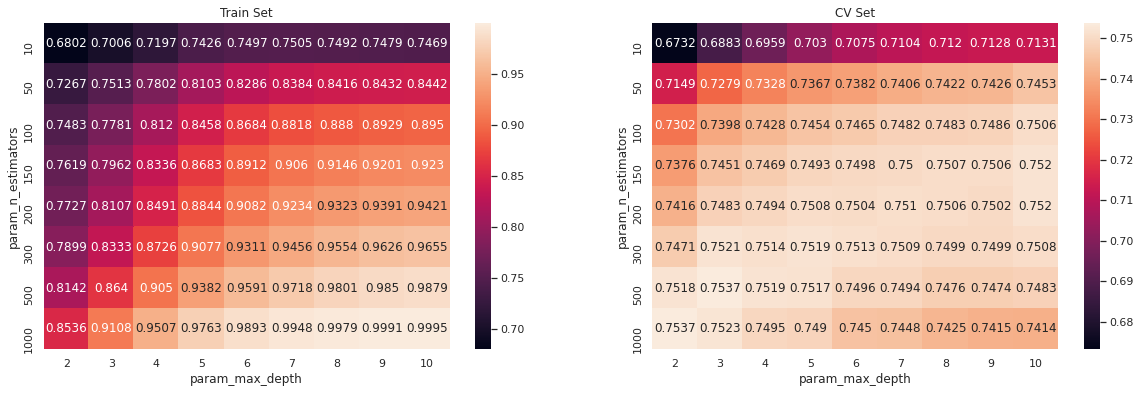

In [79]:
import seaborn as sns; sns.set()
max_scores1 = pd.DataFrame(gs.cv_results_).groupby(['param_n_estimators', 'param_max_depth']).max().unstack()[['mean_test_score', 'mean_train_score']]
fig, ax = plt.subplots(1,2, figsize=(20,6))
sns.heatmap(max_scores1.mean_train_score, annot = True, fmt='.4g', ax=ax[0])
sns.heatmap(max_scores1.mean_test_score, annot = True, fmt='.4g', ax=ax[1])
ax[0].set_title('Train Set')
ax[1].set_title('CV Set')
plt.show()

In [80]:
max_depth = gs.best_params_['max_depth']
n_estimators = gs.best_params_['n_estimators']

In [81]:
print(max_depth)
print(n_estimators)

2
1000


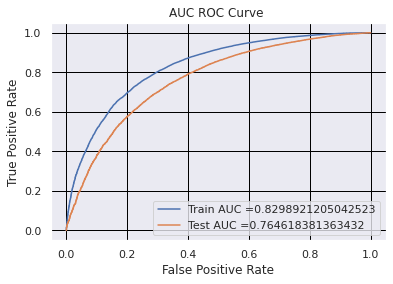

In [82]:
from sklearn.metrics import roc_curve, auc
model = lgbm.LGBMClassifier(max_depth = max_depth, n_estimators = n_estimators)

model.fit(X_train,project_y_train)

y_train_pred = model.predict_proba(X_train)[:,1]     
y_test_pred = model.predict_proba(X_test)[:,1] 

train_fpr, train_tpr, tr_thresholds = roc_curve(project_y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(project_y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("AUC ROC Curve ")
plt.grid(color='black', linestyle='-', linewidth=1)
plt.show()

In [83]:
def find_best_threshold(threshold, fpr, tpr):
    t = threshold[np.argmax(tpr*(1-fpr))]
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    return t

def predict_with_best_t(proba, threshold):
    predictions = []
    for i in proba:
        if i>=threshold:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

In [84]:
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
print("Train confusion matrix")
print(confusion_matrix(project_y_train, predict_with_best_t(y_train_pred, best_t)))

the maximum value of tpr*(1-fpr) 0.5679551316898147 for threshold 0.829
Train confusion matrix
[[ 8256  2827]
 [14756 47357]]


Train data confusion matrix


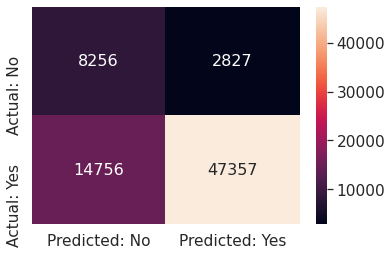

In [85]:
print("Train data confusion matrix")

confusion_matrix_df_train = pd.DataFrame(confusion_matrix(project_y_train, predict_with_best_t(y_train_pred, best_t)), ['Actual: No','Actual: Yes'],['Predicted: No','Predicted: Yes'])
sns.set(font_scale=1.4)#for label size
sns.heatmap(confusion_matrix_df_train, annot=True,annot_kws={"size": 16}, fmt='g')

In [86]:
print("Test confusion matrix")
print(confusion_matrix(project_y_test, predict_with_best_t(y_test_pred, best_t)))

Test confusion matrix
[[ 3596  1863]
 [ 7892 22701]]


Test data confusion matrix


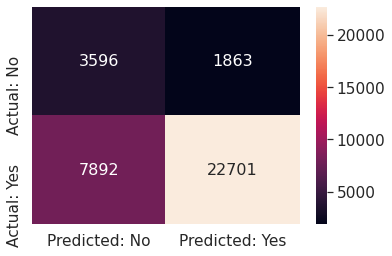

In [87]:
print("Test data confusion matrix")

confusion_matrix_df_test = pd.DataFrame(confusion_matrix(project_y_test, predict_with_best_t(y_test_pred, best_t)), ['Actual: No','Actual: Yes'],['Predicted: No','Predicted: Yes'])
sns.set(font_scale=1.4)#for label size
sns.heatmap(confusion_matrix_df_test, annot=True,annot_kws={"size": 16}, fmt='g')

In [88]:
print(len(train_tfidf_w2v_titles))
print(len(train_tfidf_w2v_essays))
print(len(test_tfidf_w2v_titles))
print(len(test_tfidf_w2v_titles))

73196
73196
36052
36052


In [89]:
import numpy as np
train_w2v_essays_np = np.array(train_tfidf_w2v_essays)
train_w2v_titles_np = np.array(train_tfidf_w2v_titles)
test_w2v_essays_np = np.array(test_tfidf_w2v_essays)
test_w2v_titles_np = np.array(test_tfidf_w2v_titles)

In [90]:
from scipy.sparse import coo_matrix, hstack
tr1 = coo_matrix(project_train_category_0)
tr2 = coo_matrix(project_train_category_1)
tr3 = coo_matrix(project_train_subcategory_0)
tr4 = coo_matrix(project_train_subcategory_1)
tr5 = coo_matrix(project_train_grade_0)
tr6 = coo_matrix(project_train_grade_1)
tr7 = coo_matrix(project_train_state_0)
tr8 = coo_matrix(project_train_state_1)
tr9 = coo_matrix(project_train_prefix_0)
tr10 = coo_matrix(project_train_prefix_1)
tr11 = coo_matrix(project_train_price)
tr12 = coo_matrix(project_train_quantity)
tr13 = coo_matrix(project_train_previousprojects)
tr14 = coo_matrix(negative_tr)
tr15 = coo_matrix(positive_tr)
tr16 = coo_matrix(neutral_tr)
tr17 = coo_matrix(compound_tr)
tr18 = coo_matrix(train_w2v_essays_np)
tr19 = coo_matrix(train_w2v_titles_np)
te1 = coo_matrix(project_test_category_0)
te2 = coo_matrix(project_test_category_1)
te3 = coo_matrix(project_test_subcategory_0)
te4 = coo_matrix(project_test_subcategory_1)
te5 = coo_matrix(project_test_grade_0)
te6 = coo_matrix(project_test_grade_1)
te7 = coo_matrix(project_test_state_0)
te8 = coo_matrix(project_test_state_1)
te9 = coo_matrix(project_test_prefix_0)
te10 = coo_matrix(project_test_prefix_1)
te11 = coo_matrix(project_test_price)
te12 = coo_matrix(project_test_quantity)
te13 = coo_matrix(project_test_previousprojects)
te14 = coo_matrix(negative_te)
te15 = coo_matrix(positive_te)
te16 = coo_matrix(neutral_te)
te17 = coo_matrix(compound_te)
te18 = coo_matrix(test_w2v_essays_np)
te19 = coo_matrix(test_w2v_titles_np)

In [91]:
X_train2 = hstack([tr1,tr2,tr3,tr4,tr5,tr6,tr7,tr8,tr9,tr10,tr11,tr12,tr13,tr18,tr19]).tocsr()
X_test2 = hstack([te1,te2,te3,te4,te5,te6,te7,te8,te9,te10,te11,te12,te13,te18,te19]).tocsr()

In [92]:
from sklearn.model_selection import GridSearchCV
import lightgbm as lgbm

gbdt2= lgbm.LGBMClassifier()

grid_params = {'n_estimators': [10, 50, 100, 150, 200, 300, 500, 1000], 'max_depth':[2, 3, 4, 5, 6, 7, 8, 9, 10]}
 
gs = GridSearchCV(gbdt2, grid_params, cv=3, scoring='roc_auc',return_train_score=True,n_jobs=-1)
gs.fit(X_train2, project_y_train)
print(gs.best_score_)
print(gs.best_estimator_)
print(gs.best_params_)

0.7376718698225084
LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=3,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=300, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
{'max_depth': 3, 'n_estimators': 300}


In [93]:
print('Best score: ',gs.best_score_)
print('k value with best score: ',gs.best_params_)
print('='*75)
print('Train AUC scores')
print(gs.cv_results_['mean_train_score'])
print('CV AUC scores')
print(gs.cv_results_['mean_test_score'])

Best score:  0.7376718698225084
k value with best score:  {'max_depth': 3, 'n_estimators': 300}
Train AUC scores
[0.68753308 0.73129907 0.74884499 0.75995062 0.76927923 0.78431564
 0.80796148 0.85056138 0.70928769 0.75511457 0.78056245 0.799886
 0.81673333 0.84443698 0.88506082 0.9458945  0.72860372 0.78684636
 0.82524889 0.85542507 0.87973989 0.91613571 0.95961745 0.99575941
 0.75331662 0.83106749 0.88341243 0.91901273 0.9442622  0.97451251
 0.99608427 0.99999771 0.75235069 0.84119826 0.90302094 0.93942725
 0.96245939 0.98686216 0.99890595 0.99999961 0.75160451 0.84324912
 0.90808621 0.94551045 0.96816728 0.98949243 0.99936081 0.99999977
 0.75074254 0.84469922 0.91132253 0.94918934 0.97109212 0.99156378
 0.99956896 0.99999979 0.7507062  0.84575761 0.91331392 0.95221217
 0.97348611 0.99257964 0.99966329 0.99999987 0.75095262 0.84776807
 0.9148869  0.95269643 0.97442126 0.99295278 0.99969404 0.99999987]
CV AUC scores
[0.68068458 0.71693693 0.72771588 0.73205367 0.73396396 0.73610237
 0.

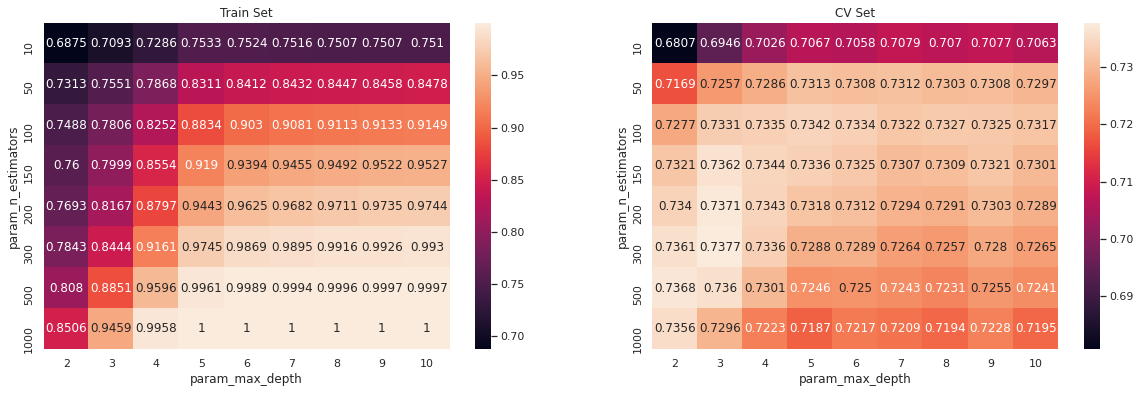

In [94]:
import seaborn as sns; sns.set()
max_scores1 = pd.DataFrame(gs.cv_results_).groupby(['param_n_estimators', 'param_max_depth']).max().unstack()[['mean_test_score', 'mean_train_score']]
fig, ax = plt.subplots(1,2, figsize=(20,6))
sns.heatmap(max_scores1.mean_train_score, annot = True, fmt='.4g', ax=ax[0])
sns.heatmap(max_scores1.mean_test_score, annot = True, fmt='.4g', ax=ax[1])
ax[0].set_title('Train Set')
ax[1].set_title('CV Set')
plt.show()

In [96]:
max_depth = gs.best_params_['max_depth']
n_estimators = gs.best_params_['n_estimators']

In [97]:
print(max_depth)
print(n_estimators)

3
300


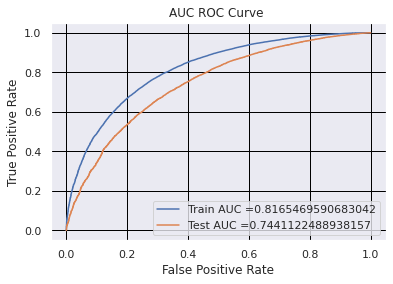

In [98]:
from sklearn.metrics import roc_curve, auc
model = lgbm.LGBMClassifier(max_depth = max_depth, n_estimators = n_estimators)

model.fit(X_train2,project_y_train)

y_train_pred = model.predict_proba(X_train2)[:,1]     
y_test_pred = model.predict_proba(X_test2)[:,1] 

train_fpr, train_tpr, tr_thresholds = roc_curve(project_y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(project_y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("AUC ROC Curve ")
plt.grid(color='black', linestyle='-', linewidth=1)
plt.show()

In [99]:
def find_best_threshold(threshold, fpr, tpr):
    t = threshold[np.argmax(tpr*(1-fpr))]
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    return t

def predict_with_best_t(proba, threshold):
    
    predictions = []
    for i in proba:
        if i>=threshold:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

In [100]:
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
print("Train confusion matrix")
print(confusion_matrix(project_y_train, predict_with_best_t(y_train_pred, best_t)))

the maximum value of tpr*(1-fpr) 0.5476216439492807 for threshold 0.829
Train confusion matrix
[[ 7993  3090]
 [14949 47164]]


Train data confusion matrix


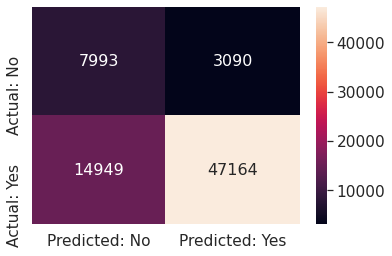

In [101]:
print("Train data confusion matrix")

confusion_matrix_df_train = pd.DataFrame(confusion_matrix(project_y_train, predict_with_best_t(y_train_pred, best_t)), ['Actual: No','Actual: Yes'],['Predicted: No','Predicted: Yes'])
sns.set(font_scale=1.4)#for label size
sns.heatmap(confusion_matrix_df_train, annot=True,annot_kws={"size": 16}, fmt='g')

In [102]:
print("Test confusion matrix")
print(confusion_matrix(project_y_test, predict_with_best_t(y_test_pred, best_t)))

Test confusion matrix
[[ 3391  2068]
 [ 8111 22482]]


Test data confusion matrix


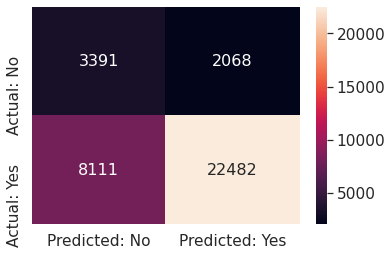

In [103]:
print("Test data confusion matrix")

confusion_matrix_df_test = pd.DataFrame(confusion_matrix(project_y_test, predict_with_best_t(y_test_pred, best_t)), ['Actual: No','Actual: Yes'],['Predicted: No','Predicted: Yes'])
sns.set(font_scale=1.4)#for label size
sns.heatmap(confusion_matrix_df_test, annot=True,annot_kws={"size": 16}, fmt='g')

<br>Apply GBDT on different kind of featurization as mentioned in the instructions
<br> For Every model that you work on make sure you do the step 2 and step 3 of instrucations

<h1>3. Summary</h1>

<br> as mentioned in the step 4 of instructions

In [104]:
from prettytable import PrettyTable
tb = PrettyTable()
tb.field_names= (" Vectorizer ", " Max_depth ", " N_estimators "," Test -AUC ")
tb.add_row([" Tfidf", 2 , 1000 , 76.46 ])
tb.add_row([" Tfidf-W2V", 3, 300, 74.41])

In [105]:
print(tb.get_string(titles = "Gradient Boosted Decision trees- Observations"))

+--------------+-------------+----------------+-------------+
|  Vectorizer  |  Max_depth  |  N_estimators  |  Test -AUC  |
+--------------+-------------+----------------+-------------+
|     Tfidf    |      2      |      1000      |    76.46    |
|   Tfidf-W2V  |      3      |      300       |    74.41    |
+--------------+-------------+----------------+-------------+
